In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
X_train = pd.read_csv('../data/training_set_features.csv', index_col='respondent_id')
y_train = pd.read_csv('../data/training_set_labels.csv', index_col='respondent_id')

In [3]:
df = X_train.merge(y_train, on = 'respondent_id')

In [4]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# EDA

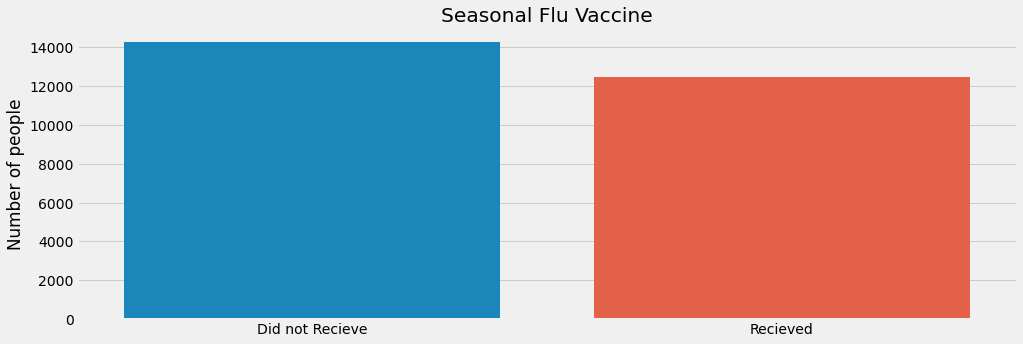

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.seasonal_vaccine)
plt.title('Seasonal Flu Vaccine')
plt.xlabel('')
plt.ylabel('Number of people')
ax.set_xticklabels(['Did not Recieve', 'Recieved']);

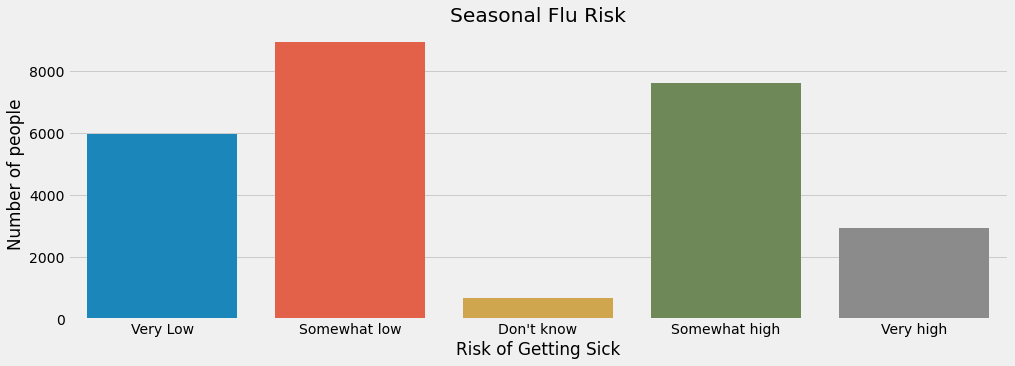

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.opinion_seas_risk)
plt.title('Seasonal Flu Risk')
plt.xlabel('Risk of Getting Sick')
plt.ylabel('Number of people')
ax.set_xticklabels(['Very Low', 'Somewhat low',
                    'Don\'t know', 'Somewhat high', 'Very high']);

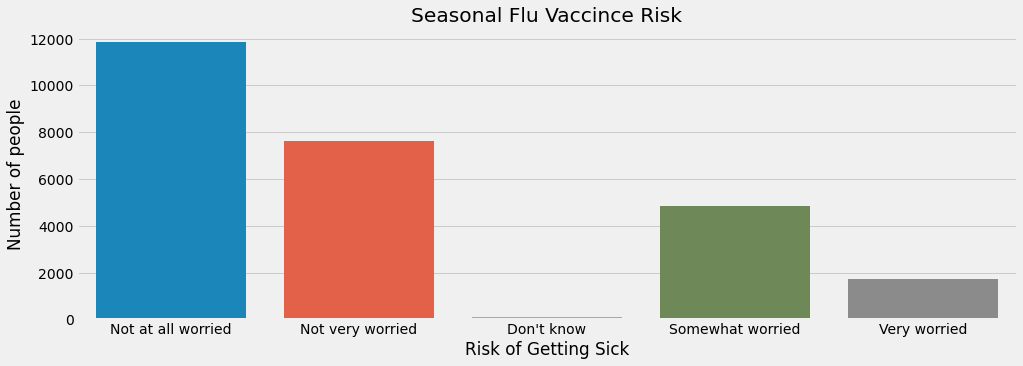

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.opinion_seas_sick_from_vacc)
plt.title('Seasonal Flu Vaccince Risk')
plt.xlabel('Risk of Getting Sick')
plt.ylabel('Number of people')
ax.set_xticklabels(['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']);

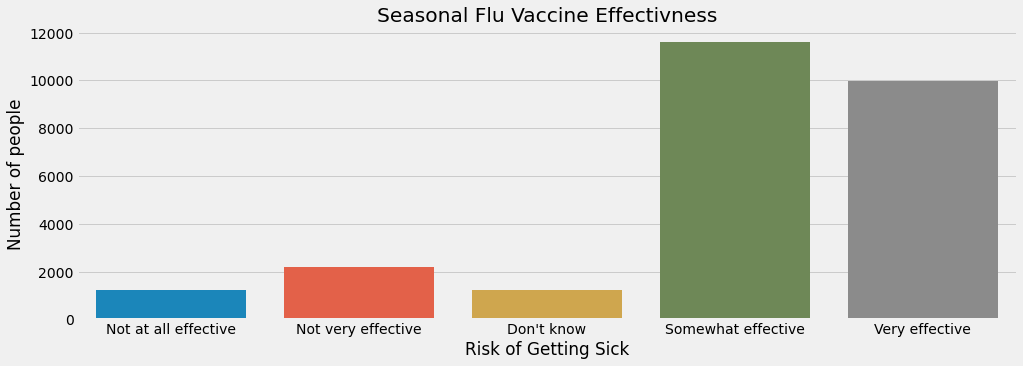

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.opinion_seas_vacc_effective)
plt.title('Seasonal Flu Vaccine Effectivness')
plt.xlabel('Risk of Getting Sick')
plt.ylabel('Number of people')
ax.set_xticklabels(['Not at all effective', 'Not very effective',
                    'Don\'t know', 'Somewhat effective', 'Very effective']);

## Race and Risk of Seasonal Flu

In [9]:
df.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [10]:
white = df[df.race == 'White']
white_concern = white.opinion_seas_risk.value_counts(normalize = True).sort_index()
white_concern*100

1.0    21.808230
2.0    35.209104
3.0     2.520766
4.0    30.263600
5.0    10.198300
Name: opinion_seas_risk, dtype: float64

In [11]:
black = df[df.race == 'Black']
black_concern = black.opinion_seas_risk.value_counts(normalize = True).sort_index()
black_concern*100

1.0    32.399807
2.0    28.681796
3.0     3.524867
4.0    22.356350
5.0    13.037180
Name: opinion_seas_risk, dtype: float64

In [12]:
hispanic = df[df.race == 'Hispanic']
hispanic_concern = hispanic.opinion_seas_risk.value_counts(normalize = True).sort_index()
hispanic_concern*100

1.0    22.260669
2.0    28.546713
3.0     2.133795
4.0    25.663206
5.0    21.395617
Name: opinion_seas_risk, dtype: float64

In [13]:
other_multiple = df[df.race == 'Other or Multiple']
other_multiple_concern = other_multiple.opinion_seas_risk.value_counts(normalize = True).sort_index()
other_multiple_concern*100

1.0    24.023062
2.0    34.080717
3.0     2.690583
4.0    26.841768
5.0    12.363869
Name: opinion_seas_risk, dtype: float64

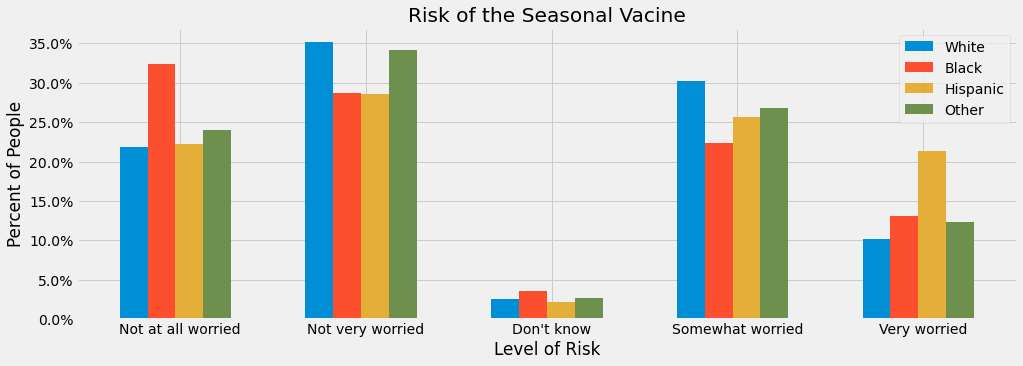

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.15
plt.bar(white_concern.index, white_concern.values, width= width, label = 'White')
plt.bar(black_concern.index + width, black_concern.values, width=width, label = 'Black')
plt.bar(hispanic_concern.index + width*2, hispanic_concern.values, width=width, label = 'Hispanic')
plt.bar(other_multiple_concern.index + width*3, other_multiple_concern.values, width=width, label = 'Other')
plt.title('Risk of the Seasonal Vaccine')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=white_concern.index + width+.10, labels=x);

# Race and Vaccine Effectiveness

In [16]:
white = df[df.race == 'White']
white_concern = white.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
white_concern*100

1.0     4.074198
2.0     7.841634
3.0     4.577482
4.0    44.595696
5.0    38.910991
Name: opinion_seas_vacc_effective, dtype: float64

In [17]:
black = df[df.race == 'Black']
black_concern = black.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
black_concern*100

1.0     7.774022
2.0     9.753742
3.0     5.939160
4.0    42.491550
5.0    34.041526
Name: opinion_seas_vacc_effective, dtype: float64

In [18]:
hispanic = df[df.race == 'Hispanic']
hispanic_concern = hispanic.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
hispanic_concern*100

1.0     5.926352
2.0    11.277330
3.0     3.970081
4.0    40.966628
5.0    37.859609
Name: opinion_seas_vacc_effective, dtype: float64

In [19]:
other_multiple = df[df.race == 'Other or Multiple']
other_multiple_concern = other_multiple.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
other_multiple_concern*100

1.0     6.802289
2.0    10.934520
3.0     4.386523
4.0    46.598856
5.0    31.277813
Name: opinion_seas_vacc_effective, dtype: float64

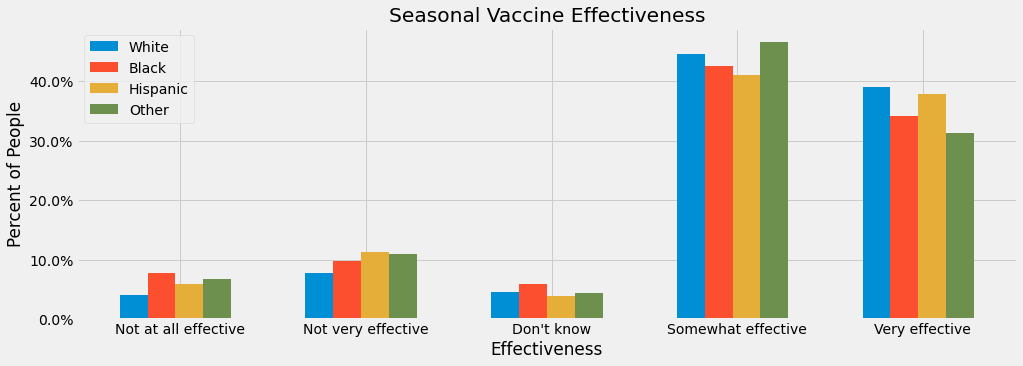

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all effective', 'Not very effective',
                    'Don\'t know', 'Somewhat effective', 'Very effective']
width = 0.15
plt.bar(white_concern.index, white_concern.values, width= width, label = 'White')
plt.bar(black_concern.index + width, black_concern.values, width=width, label = 'Black')
plt.bar(hispanic_concern.index + width*2, hispanic_concern.values, width=width, label = 'Hispanic')
plt.bar(other_multiple_concern.index + width*3, other_multiple_concern.values, width=width, label = 'Other')
plt.title('Seasonal Vaccine Effectiveness')
plt.ylabel('Percent of People')
plt.xlabel('Effectiveness')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=white_concern.index + width+.10, labels=x);